In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from IPython.display import clear_output

In [2]:
# ~~ Constants ~~
G = 6.67*10**(-20) #[km^3/(kg*s^2)]
R_earth = 8 #6371 #[km] #reduce it or else it takes forever to run
R_protoearth = int(0.80 * R_earth) #can adjust the radius of proto earth
R_theia = int(0.50*R_earth)

In [3]:
R_theia

4

In [4]:
#masses in kg
Mearth = 5.972 * 10**(24-3)
ProtoEarthMass = 0.90 * Mearth 
TheiaMass = 0.01* Mearth 
ProtoEarthMass

5.374800000000001e+21

#### Initial position for Proto Earth

In [5]:
d0toedge = int(R_protoearth//2)
diameterpe = 2*R_protoearth

In [6]:
#x range for PE isn't centered at zero
xpe = np.arange(d0toedge,d0toedge+diameterpe+1) #int(R_protoearth//2 + (2*R_protoearth) +1))
#y range for PE is centered at zero
ype = np.arange(-R_protoearth, R_protoearth +1)

In [7]:
xpe[0]
ype[0]

-6

In [8]:
len(xpe)==len(ype) # they should be equal since it is the diameter

True

In [9]:
#X coordinate for the center of PE
PEXC = d0toedge + R_protoearth #int(d0toedge + R_protoearth)
PEXC

9

In [10]:
#here we want to make a list of the coordinates for each point in PE
XYZPE = [] #list of the coordinates as [x,y,z]
ds = []    #list of the points distance to the center of PE
count = 0
for i in range(len(xpe)):
    x = xpe[i]
    for j in range(len(ype)):
        y = ype[j]
        xx = abs(x-PEXC)
        d = np.sqrt((xx)**2 + y**2)
        if d <= R_protoearth:
            z = np.sqrt(R_protoearth**2 - d**2)
            if z==0:
                if x<=PEXC:
                    count += 1
                ds += [d]
                XYZPE += [[x,y,0]]
            else:
                zlin = np.arange(-z,z+1,1)#(-int(z),int(z)+1,1) #for every x,y pair we need multiple z's to make up the inside of PE
                for zi in zlin:
                    if x<=PEXC:
                        count += 1
                    ds += [d]
                    XYZPE += [[x,y,zi]]

In [11]:
Rpe = np.asarray(XYZPE) 
#turn it into an array so we can work with the data faster

In [12]:
#initial velocity of PE is 0 for every point
VPEX = [0]*len(Rpe[:,0])
VPEY = [0]*len(Rpe[:,1])
VPEZ = [0]*len(Rpe[:,2])

In [13]:
len(Rpe[:,0]) #total number of points that make up PE

1057

In [14]:
#count how many points are within half of a radius from the center
counthalf = 0
for d in ds:
    if d<(R_protoearth*2/3):
        counthalf += 1
counthalf

553

In [15]:
#this is my way of making the center more dense than the outer layer
mpe = []
minner = (0.9*ProtoEarthMass)/counthalf
mouter = (0.1*ProtoEarthMass)/(len(ds)-counthalf)
for i in range(len(ds)):
    if i<count:
        mpe+= [minner**2]
    if ds[i]<(R_protoearth/2):
        mpe += [minner]
    else:
        mpe += [mouter]
print(minner,mouter)

8.747414104882461e+18 1.0664285714285715e+18


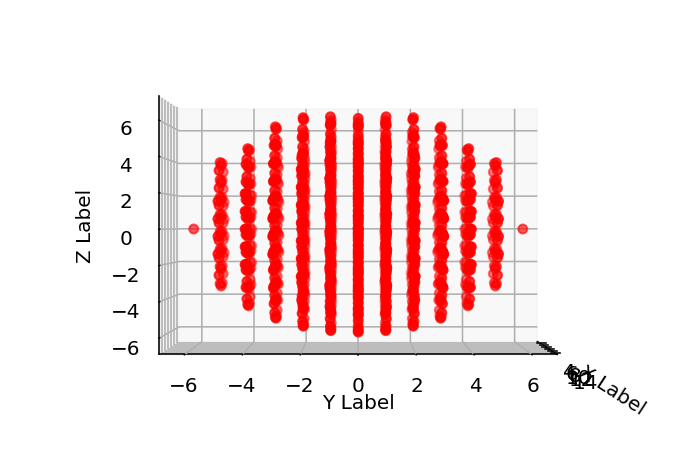

In [16]:
#plot PE
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Rpe[:,0], Rpe[:,1], Rpe[:,2], c='r', marker='o')
ax.view_init(elev=0., azim=0)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

#### Initial Position for Theia

In [17]:
angle = 30 #[degrees] #make it 30-40
dist = int(R_earth/3) #distance the edge of PE is to the edge of TH
edgeofpe = d0toedge + diameterpe #int(d0toedge + diameterpe)
diametertheia = 2*R_theia
#how high theia initially is above the plane
above = np.tan(np.radians(angle))*np.sqrt((R_protoearth+dist+R_theia)**2) #int(round(np.tan(np.radians(angle))*np.sqrt((R_protoearth+dist+R_theia)**2))) #+ (3/2*R_theia)**2)))
xth = np.arange(edgeofpe+dist, edgeofpe+dist+diametertheia)
yth = np.arange(-R_theia, R_theia) #int(R_theia/2), int(R_theia/2+ R_theia*2))

In [18]:
xth[0]
yth[0]

-4

In [19]:
XYZTH = []
THXC = edgeofpe+dist + R_theia #x coord for center of proto earth
THYC = 0#int(R_theia/2+R_theia)  #y coord for center of proto earth
for i in range(len(xth)):
    x = xth[i]
    for j in range(len(yth)):
        y = yth[j]
        xx = abs(x-THXC)
        yy = abs(y-THYC)
        d = np.sqrt((xx)**2 + yy**2)
        if d <= R_theia:
            z = np.sqrt(R_theia**2 - d**2)
            if z==0:
                XYZTH += [[x,y,above]]#[[int(x),int(y),above]]
            else:
                zlin = np.arange(-z,z+1,1)#-int(z),int(z)+1,1)
                for zi in zlin:
                    XYZTH += [[x,y,zi+above]]

In [20]:
Rtheia = np.asarray(XYZTH)

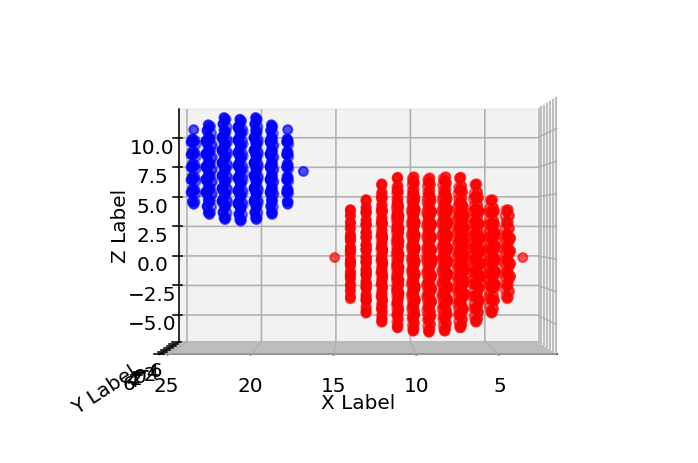

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Rpe[:,0], Rpe[:,1], Rpe[:,2], c='r', marker='o')
ax.scatter(Rtheia[:,0], Rtheia[:,1], Rtheia[:,2], c='b', marker='o')
ax.view_init(elev=0., azim=90)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [22]:
#mass of one dot will be approximated to the totmass/Numofdots
#only one mass for theia dots
mt  = TheiaMass/len(Rtheia[:,0])
mt

1.8489164086687306e+17

#### Trajectory of Theia

In [23]:
#initial velocity of theia
vth = -4 #[km/s]
#phi = np.arctan((R_protoearth+dist+R_theia)/THYC) #Comes out in radians
vthx = vth*np.cos(np.radians(angle))#*np.sin(phi)
vthy = 0#vth*np.cos(np.radians(angle))*np.cos(phi)
vthz = vth*np.sin(np.radians(angle))
#np.cos(phi)

In [24]:
vthz

-1.9999999999999998

In [25]:
VTHX = [vthx]*len(Rtheia[:,0])
VTHY = [vthy]*len(Rtheia[:,0])
VTHZ = [vthz]*len(Rtheia[:,0])

In [26]:
vtheia = []
for i in range(len(VTHX)):
    vtheia += [[VTHX[i],VTHY[i],VTHZ[i]]]
    
vpe = []
for i in range(len(VPEX)):
    vpe += [[VPEX[i],VPEY[i],VPEZ[i]]]

In [27]:
Vtheia = np.asarray(vtheia)
Vpe = np.asarray(vpe)

In [28]:
print(Rtheia.shape)
print(Rpe.shape)
print(Vtheia.shape)
print(Vpe.shape)

(323, 3)
(1057, 3)
(323, 3)
(1057, 3)


In [29]:
print(Rtheia[0])
print(Rpe[0])
print(Vtheia[0])
print(Vpe[0])

[17.          0.          6.92820323]
[3. 0. 0.]
[-3.46410162  0.         -2.        ]
[0 0 0]


In [30]:
# can do x = x0 + vt +1/2at^2

In [31]:
def update_pos(dt,R,V):
    xs = R[:,0]
    ys = R[:,1]
    zs = R[:,2]
    
    vx = V[:,0]
    vy = V[:,1]
    vz = V[:,2]
    
    newr = []
    for i in range(len(xs)):
        newx = xs[i]+ (vx[i]*dt)#int(round(xs[i]+ (vx[i]*dt)))
        newy = ys[i]+ (vy[i]*dt)#int(round(ys[i]+ (vy[i]*dt)))
        newz = zs[i]+ (vz[i]*dt)#int(round(zs[i]+ (vz[i]*dt)))
        newr += [[newx,newy,newz]]
    R = np.asarray(newr)
    return R

In [32]:
def elastic_collision(m1,m2,u1,u2): #make sure inputed u is an array of 3 values
    v1 = ((m1-m2)/(m1+m2))*u1 + ((2*m2)/(m1+m2))*u2
    v2 = ((2*m1)/(m1+m2))*u1 + ((m2-m1)/(m1+m2))*u2
    return v1,v2

In [33]:
def update_vel2(dt, Rtheia, Vtheia, Rpe, Vpe):
    
    R = np.concatenate((Rtheia,Rpe))
    rl = len(Rtheia)
    V = np.concatenate((Vtheia,Vpe))
    
    for i in range(len(R)-1):
        R2 = R[i+1:]
        for j in range(len(R2)):
            if abs(R[i,0] - R2[j,0]) <0.5:
                if abs(R[i,1] - R2[j,1]) <0.5:
                    if abs(R[i,2] - R2[j,2]) <0.5:
#                         print(R[i],i,j)
                        m1 = mt
                        m2 = mt
                        if i>(rl-1):
                            m1=mpe[i-rl]
                        if (j+i+1) > (rl-1):
                            m2=mpe[j+i+1 - rl]
                        vinew, vjnew = elastic_collision(m1,m2,V[i],V[j+i+1])
                        V[i] = vinew
                        V[j+i+1] = vjnew
                            
    Vtheia = V[0:rl]
    Vpe = V[rl:]
    return Vtheia,Vpe

In [34]:
PhantomR = np.asarray((60,5,20))
PhantomV = np.asarray((0,-1,-.5))

In [35]:
def KeplerODE(y):
    global ProtoEarthMass,mt,G, PEXC

    r = y[0:3] - np.asarray([PEXC,0,0])
    v = y[3:6]
    #print('kep', type(r))

    drdt = v 

    F    = - ProtoEarthMass * mt * G / np.linalg.norm(r)**3 * r
    a    = F /mt
    dvdt = a
    
    return np.concatenate((drdt,dvdt))

In [36]:
def KeplerODE2(y):
    global ProtoEarthMass,mt,G, PhantomR

    r = y[0:3] - PhantomR
    v = y[3:6]
    #print('kep', type(r))

    drdt = v 

    F    = - ProtoEarthMass * mt * G / np.linalg.norm(r)**3 * r
    a    = F /mt
    dvdt = a
    
    return np.concatenate((drdt,dvdt))

In [37]:
def update_grav(dt, Rtheia, Vtheia, Rpe, Vpe, PhantomR, PhantomV,n):
    global edgeofpe
    thlist = []
    m=6
    for i in range(len(Rtheia)):
        
        if abs(Rtheia[i,0] - PhantomR[0]) < m:
            if abs(Rtheia[i,1] - PhantomR[1]) < m:
                if abs(Rtheia[i,2] - PhantomR[2]) < m:
                    thlist += [i]
                    
        elif Rtheia[i,0]<edgeofpe+20:
            y = np.concatenate((Rtheia[i],Vtheia[i]))
            #print(type(Rtheia[i]))
            f1 = KeplerODE(y)
            f2 = KeplerODE(y+f1*dt/2.0)
            f3 = KeplerODE(y+f2*dt/2.0)
            f4 = KeplerODE(y+f3*dt)
            y = y + (f1 + 2.0*f2 + 2.0*f3 + f4) / 6.0 * dt
            Rtheia[i] = y[0:3]
            Vtheia[i] = y[3:6]
                    
        elif Rtheia[i,0]>edgeofpe+20:
            y = np.concatenate((Rtheia[i],Vtheia[i]))
            #print(type(Rtheia[i]))
            f1 = KeplerODE2(y)
            f2 = KeplerODE2(y+f1*dt/2.0)
            f3 = KeplerODE2(y+f2*dt/2.0)
            f4 = KeplerODE2(y+f3*dt)
            y = y + (f1 + 2.0*f2 + 2.0*f3 + f4) / 6.0 * dt
            Rtheia[i] = y[0:3]
            Vtheia[i] = y[3:6]
            
        elif Rtheia[i,0]<edgeofpe:
            if n<63:
                Vtheia[i] = np.asarray([0,0,0])
            
    pelist = []    
    for i in range(len(Rpe)):
        
        if abs(Rpe[i,0] - PhantomR[0]) < m-2:
            if abs(Rpe[i,1] - PhantomR[1]) < m-2:
                if abs(Rpe[i,2] - PhantomR[2]) < m-2:
                    pelist += [i]
                    
        elif Rpe[i,0]<edgeofpe+20:
            y = np.concatenate((Rpe[i],Vpe[i]))
            f1 = KeplerODE(y)
            f2 = KeplerODE(y+f1*dt/2.0)
            f3 = KeplerODE(y+f2*dt/2.0)
            f4 = KeplerODE(y+f3*dt)
            y = y + (f1 + 2.0*f2 + 2.0*f3 + f4) / 6.0 * dt
            Rpe[i] = y[0:3]
            Vpe[i] = y[3:6]
                    
        elif Rpe[i,0]>edgeofpe+20:
            y = np.concatenate((Rpe[i],Vpe[i]))
            #print(type(Rtheia[i]))
            f1 = KeplerODE2(y)
            f2 = KeplerODE2(y+f1*dt/2.0)
            f3 = KeplerODE2(y+f2*dt/2.0)
            f4 = KeplerODE2(y+f3*dt)
            y = y + (f1 + 2.0*f2 + 2.0*f3 + f4) / 6.0 * dt
            Rpe[i] = y[0:3]
            Vpe[i] = y[3:6]
            
        elif Rpe[i,0]<edgeofpe:
            if n<63:
                Vpe[i] = np.asarray([0,0,0])
            
    y = np.concatenate((PhantomR,PhantomV))
    f1 = KeplerODE(y)
    f2 = KeplerODE(y+f1*dt/2.0)
    f3 = KeplerODE(y+f2*dt/2.0)
    f4 = KeplerODE(y+f3*dt)
    y = y + (f1 + 2.0*f2 + 2.0*f3 + f4) / 6.0 * dt
    PhantomR = y[0:3]
    PhantomV = y[3:6]
    
    for i in thlist:
        Rtheia[i]= PhantomR
        Vtheia[i]= PhantomV
    for i in pelist:
        Rpe[i]= PhantomR
        Vpe[i]= PhantomV
            
    return Rtheia, Vtheia, Rpe, Vpe, PhantomR, PhantomV

In [38]:
from matplotlib.animation import FFMpegWriter
metadata = dict(title='Proj', artist='Matplotlib',comment='Theia trajectory5')
writer = FFMpegWriter(fps=15, metadata=metadata,bitrate=200000)
fig = plt.figure(dpi=200)

<Figure size 1200x800 with 0 Axes>

In [39]:
dt = 1/4 #seconds
t = 120 #total seconds
N = int(t/dt)
az = 180/70
el = 70/70
ele = 20
azi=90
with writer.saving(fig,"Theia22gravp1.mp4", dpi=200):
    for n in range(N):
        print(n)
        if n < 20:
            Vtheia, Vpe = update_vel2(dt, Rtheia, Vtheia, Rpe, Vpe)
            Rtheia = update_pos(dt,Rtheia,Vtheia)
            Rpe = update_pos(dt,Rpe, Vpe)
        else:
            Rtheia, Vtheia, Rpe, Vpe,PhantomR, PhantomV = update_grav(dt, Rtheia, Vtheia, Rpe, Vpe,PhantomR, PhantomV,n)
        fig.clear()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(Rpe[:,0], Rpe[:,1], Rpe[:,2], c='r', marker='o')
        #ax.scatter(PhantomR[0], PhantomR[1], PhantomR[2], c='g', marker='o')
        ax.scatter(Rtheia[:,0],Rtheia[:,1],Rtheia[:,2], c='b', marker='o')
        ax.view_init(elev=ele, azim=azi)
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        ax.set_ylim3d([-50, 50])
        if n < 70:
            azi += az
            ele += el
        ax.set_xlim3d([-30, 100])
        ax.set_zlim3d([-30, 30])
        ax.set_autoscale_on(False)
        #plt.show()
        plt.draw()
        plt.pause(0.05)
        writer.grab_frame()

0


<Figure size 432x288 with 0 Axes>

1


<Figure size 432x288 with 0 Axes>

2


<Figure size 432x288 with 0 Axes>

3


<Figure size 432x288 with 0 Axes>

4


<Figure size 432x288 with 0 Axes>

5


<Figure size 432x288 with 0 Axes>

6


<Figure size 432x288 with 0 Axes>

7


<Figure size 432x288 with 0 Axes>

8


<Figure size 432x288 with 0 Axes>

9


<Figure size 432x288 with 0 Axes>

10


<Figure size 432x288 with 0 Axes>

11


<Figure size 432x288 with 0 Axes>

12


<Figure size 432x288 with 0 Axes>

13


<Figure size 432x288 with 0 Axes>

14


<Figure size 432x288 with 0 Axes>

15


<Figure size 432x288 with 0 Axes>

16


<Figure size 432x288 with 0 Axes>

17


<Figure size 432x288 with 0 Axes>

18


<Figure size 432x288 with 0 Axes>

19


<Figure size 432x288 with 0 Axes>

20


<ipython-input-35-1d94a716aac7>:10: RuntimeWarning: divide by zero encountered in double_scalars
  F    = - ProtoEarthMass * mt * G / np.linalg.norm(r)**3 * r
<ipython-input-35-1d94a716aac7>:10: RuntimeWarning: invalid value encountered in multiply
  F    = - ProtoEarthMass * mt * G / np.linalg.norm(r)**3 * r


<Figure size 432x288 with 0 Axes>

21


<Figure size 432x288 with 0 Axes>

22


<Figure size 432x288 with 0 Axes>

23


<Figure size 432x288 with 0 Axes>

24


<Figure size 432x288 with 0 Axes>

25


<Figure size 432x288 with 0 Axes>

26


<Figure size 432x288 with 0 Axes>

27


<Figure size 432x288 with 0 Axes>

28


<Figure size 432x288 with 0 Axes>

29


<Figure size 432x288 with 0 Axes>

30


<Figure size 432x288 with 0 Axes>

31


<Figure size 432x288 with 0 Axes>

32


<Figure size 432x288 with 0 Axes>

33


<Figure size 432x288 with 0 Axes>

34


<Figure size 432x288 with 0 Axes>

35


<Figure size 432x288 with 0 Axes>

36


<Figure size 432x288 with 0 Axes>

37


<Figure size 432x288 with 0 Axes>

38


<Figure size 432x288 with 0 Axes>

39


<Figure size 432x288 with 0 Axes>

40


<Figure size 432x288 with 0 Axes>

41


<Figure size 432x288 with 0 Axes>

42


<Figure size 432x288 with 0 Axes>

43


<Figure size 432x288 with 0 Axes>

44


<Figure size 432x288 with 0 Axes>

45


<Figure size 432x288 with 0 Axes>

46


<Figure size 432x288 with 0 Axes>

47


<Figure size 432x288 with 0 Axes>

48


<Figure size 432x288 with 0 Axes>

49


<Figure size 432x288 with 0 Axes>

50


<Figure size 432x288 with 0 Axes>

51


<Figure size 432x288 with 0 Axes>

52


<Figure size 432x288 with 0 Axes>

53


<Figure size 432x288 with 0 Axes>

54


<Figure size 432x288 with 0 Axes>

55


<Figure size 432x288 with 0 Axes>

56


<Figure size 432x288 with 0 Axes>

57


<Figure size 432x288 with 0 Axes>

58


<Figure size 432x288 with 0 Axes>

59


<Figure size 432x288 with 0 Axes>

60


<Figure size 432x288 with 0 Axes>

61


<Figure size 432x288 with 0 Axes>

62


<Figure size 432x288 with 0 Axes>

63


<Figure size 432x288 with 0 Axes>

64


<Figure size 432x288 with 0 Axes>

65


<Figure size 432x288 with 0 Axes>

66


<Figure size 432x288 with 0 Axes>

67


<Figure size 432x288 with 0 Axes>

68


<Figure size 432x288 with 0 Axes>

69


<Figure size 432x288 with 0 Axes>

70


<Figure size 432x288 with 0 Axes>

71


<Figure size 432x288 with 0 Axes>

72


<Figure size 432x288 with 0 Axes>

73


<Figure size 432x288 with 0 Axes>

74


<Figure size 432x288 with 0 Axes>

75


<Figure size 432x288 with 0 Axes>

76


<Figure size 432x288 with 0 Axes>

77


<Figure size 432x288 with 0 Axes>

78


<Figure size 432x288 with 0 Axes>

79


<Figure size 432x288 with 0 Axes>

80


<Figure size 432x288 with 0 Axes>

81


<Figure size 432x288 with 0 Axes>

82


<Figure size 432x288 with 0 Axes>

83


<Figure size 432x288 with 0 Axes>

84


<Figure size 432x288 with 0 Axes>

85


<Figure size 432x288 with 0 Axes>

86


<Figure size 432x288 with 0 Axes>

87


<Figure size 432x288 with 0 Axes>

88


<Figure size 432x288 with 0 Axes>

89


<Figure size 432x288 with 0 Axes>

90


<Figure size 432x288 with 0 Axes>

91


<Figure size 432x288 with 0 Axes>

92


<Figure size 432x288 with 0 Axes>

93


<Figure size 432x288 with 0 Axes>

94


<Figure size 432x288 with 0 Axes>

95


<Figure size 432x288 with 0 Axes>

96


<Figure size 432x288 with 0 Axes>

97


<Figure size 432x288 with 0 Axes>

98


<Figure size 432x288 with 0 Axes>

99


<Figure size 432x288 with 0 Axes>

100


<Figure size 432x288 with 0 Axes>

101


<Figure size 432x288 with 0 Axes>

102


<Figure size 432x288 with 0 Axes>

103


<Figure size 432x288 with 0 Axes>

104


<Figure size 432x288 with 0 Axes>

105


<Figure size 432x288 with 0 Axes>

106


<Figure size 432x288 with 0 Axes>

107


<Figure size 432x288 with 0 Axes>

108


<Figure size 432x288 with 0 Axes>

109


<Figure size 432x288 with 0 Axes>

110


<Figure size 432x288 with 0 Axes>

111


<Figure size 432x288 with 0 Axes>

112


<Figure size 432x288 with 0 Axes>

113


<Figure size 432x288 with 0 Axes>

114


<Figure size 432x288 with 0 Axes>

115


<Figure size 432x288 with 0 Axes>

116


<Figure size 432x288 with 0 Axes>

117


<Figure size 432x288 with 0 Axes>

118


<Figure size 432x288 with 0 Axes>

119


<Figure size 432x288 with 0 Axes>

120


<Figure size 432x288 with 0 Axes>

121


<Figure size 432x288 with 0 Axes>

122


<Figure size 432x288 with 0 Axes>

123


<Figure size 432x288 with 0 Axes>

124


<Figure size 432x288 with 0 Axes>

125


<Figure size 432x288 with 0 Axes>

126


<Figure size 432x288 with 0 Axes>

127


<Figure size 432x288 with 0 Axes>

128


<Figure size 432x288 with 0 Axes>

129


<Figure size 432x288 with 0 Axes>

130


<Figure size 432x288 with 0 Axes>

131


<Figure size 432x288 with 0 Axes>

132


<Figure size 432x288 with 0 Axes>

133


<Figure size 432x288 with 0 Axes>

134


<Figure size 432x288 with 0 Axes>

135


<Figure size 432x288 with 0 Axes>

136


<Figure size 432x288 with 0 Axes>

137


<Figure size 432x288 with 0 Axes>

138


<Figure size 432x288 with 0 Axes>

139


<Figure size 432x288 with 0 Axes>

140


<Figure size 432x288 with 0 Axes>

141


<Figure size 432x288 with 0 Axes>

142


<Figure size 432x288 with 0 Axes>

143


<Figure size 432x288 with 0 Axes>

144


<Figure size 432x288 with 0 Axes>

145


<Figure size 432x288 with 0 Axes>

146


<Figure size 432x288 with 0 Axes>

147


<Figure size 432x288 with 0 Axes>

148


<Figure size 432x288 with 0 Axes>

149


<Figure size 432x288 with 0 Axes>

150


<Figure size 432x288 with 0 Axes>

151


<Figure size 432x288 with 0 Axes>

152


<Figure size 432x288 with 0 Axes>

153


<Figure size 432x288 with 0 Axes>

154


<Figure size 432x288 with 0 Axes>

155


<Figure size 432x288 with 0 Axes>

156


<Figure size 432x288 with 0 Axes>

157


<Figure size 432x288 with 0 Axes>

158


<Figure size 432x288 with 0 Axes>

159


<Figure size 432x288 with 0 Axes>

160


<Figure size 432x288 with 0 Axes>

161


<Figure size 432x288 with 0 Axes>

162


<Figure size 432x288 with 0 Axes>

163


<Figure size 432x288 with 0 Axes>

164


<Figure size 432x288 with 0 Axes>

165


<Figure size 432x288 with 0 Axes>

166


<Figure size 432x288 with 0 Axes>

167


<Figure size 432x288 with 0 Axes>

168


<Figure size 432x288 with 0 Axes>

169


<Figure size 432x288 with 0 Axes>

170


<Figure size 432x288 with 0 Axes>

171


<Figure size 432x288 with 0 Axes>

172


<Figure size 432x288 with 0 Axes>

173


<Figure size 432x288 with 0 Axes>

174


<Figure size 432x288 with 0 Axes>

175


<Figure size 432x288 with 0 Axes>

176


<Figure size 432x288 with 0 Axes>

177


<Figure size 432x288 with 0 Axes>

178


<Figure size 432x288 with 0 Axes>

179


<Figure size 432x288 with 0 Axes>

180


<Figure size 432x288 with 0 Axes>

181


<Figure size 432x288 with 0 Axes>

182


<Figure size 432x288 with 0 Axes>

183


<Figure size 432x288 with 0 Axes>

184


<Figure size 432x288 with 0 Axes>

185


<Figure size 432x288 with 0 Axes>

186


<Figure size 432x288 with 0 Axes>

187


<Figure size 432x288 with 0 Axes>

188


<Figure size 432x288 with 0 Axes>

189


<Figure size 432x288 with 0 Axes>

190


<Figure size 432x288 with 0 Axes>

191


<Figure size 432x288 with 0 Axes>

192


<Figure size 432x288 with 0 Axes>

193


<Figure size 432x288 with 0 Axes>

194


<Figure size 432x288 with 0 Axes>

195


<Figure size 432x288 with 0 Axes>

196


<Figure size 432x288 with 0 Axes>

197


<Figure size 432x288 with 0 Axes>

198


<Figure size 432x288 with 0 Axes>

199


<Figure size 432x288 with 0 Axes>

200


<Figure size 432x288 with 0 Axes>

201


<Figure size 432x288 with 0 Axes>

202


<Figure size 432x288 with 0 Axes>

203


<Figure size 432x288 with 0 Axes>

204


<Figure size 432x288 with 0 Axes>

205


<Figure size 432x288 with 0 Axes>

206


<Figure size 432x288 with 0 Axes>

207


<Figure size 432x288 with 0 Axes>

208


<Figure size 432x288 with 0 Axes>

209


<Figure size 432x288 with 0 Axes>

210


<Figure size 432x288 with 0 Axes>

211


<Figure size 432x288 with 0 Axes>

212


<Figure size 432x288 with 0 Axes>

213


<Figure size 432x288 with 0 Axes>

214


<Figure size 432x288 with 0 Axes>

215


<Figure size 432x288 with 0 Axes>

216


<Figure size 432x288 with 0 Axes>

217


<Figure size 432x288 with 0 Axes>

218


<Figure size 432x288 with 0 Axes>

219


<Figure size 432x288 with 0 Axes>

220


<Figure size 432x288 with 0 Axes>

221


<Figure size 432x288 with 0 Axes>

222


<Figure size 432x288 with 0 Axes>

223


<Figure size 432x288 with 0 Axes>

224


<Figure size 432x288 with 0 Axes>

225


<Figure size 432x288 with 0 Axes>

226


<Figure size 432x288 with 0 Axes>

227


<Figure size 432x288 with 0 Axes>

228


<Figure size 432x288 with 0 Axes>

229


<Figure size 432x288 with 0 Axes>

230


<Figure size 432x288 with 0 Axes>

231


<Figure size 432x288 with 0 Axes>

232


<Figure size 432x288 with 0 Axes>

233


<Figure size 432x288 with 0 Axes>

234


<Figure size 432x288 with 0 Axes>

235


<Figure size 432x288 with 0 Axes>

236


<Figure size 432x288 with 0 Axes>

237


<Figure size 432x288 with 0 Axes>

238


<Figure size 432x288 with 0 Axes>

239


<Figure size 432x288 with 0 Axes>

240


<Figure size 432x288 with 0 Axes>

241


<Figure size 432x288 with 0 Axes>

242


<Figure size 432x288 with 0 Axes>

243


<Figure size 432x288 with 0 Axes>

244


<Figure size 432x288 with 0 Axes>

245


<Figure size 432x288 with 0 Axes>

246


<Figure size 432x288 with 0 Axes>

247


<Figure size 432x288 with 0 Axes>

248


<Figure size 432x288 with 0 Axes>

249


<Figure size 432x288 with 0 Axes>

250


<Figure size 432x288 with 0 Axes>

251


<Figure size 432x288 with 0 Axes>

252


<Figure size 432x288 with 0 Axes>

253


<Figure size 432x288 with 0 Axes>

254


<Figure size 432x288 with 0 Axes>

255


<Figure size 432x288 with 0 Axes>

256


<Figure size 432x288 with 0 Axes>

257


<Figure size 432x288 with 0 Axes>

258


<Figure size 432x288 with 0 Axes>

259


<Figure size 432x288 with 0 Axes>

260


<Figure size 432x288 with 0 Axes>

261


<Figure size 432x288 with 0 Axes>

262


<Figure size 432x288 with 0 Axes>

263


<Figure size 432x288 with 0 Axes>

264


<Figure size 432x288 with 0 Axes>

265


<Figure size 432x288 with 0 Axes>

266


<Figure size 432x288 with 0 Axes>

267


<Figure size 432x288 with 0 Axes>

268


<Figure size 432x288 with 0 Axes>

269


<Figure size 432x288 with 0 Axes>

270


<Figure size 432x288 with 0 Axes>

271


<Figure size 432x288 with 0 Axes>

272


<Figure size 432x288 with 0 Axes>

273


<Figure size 432x288 with 0 Axes>

274


<Figure size 432x288 with 0 Axes>

275


<Figure size 432x288 with 0 Axes>

276


<Figure size 432x288 with 0 Axes>

277


<Figure size 432x288 with 0 Axes>

278


<Figure size 432x288 with 0 Axes>

279


<Figure size 432x288 with 0 Axes>

280


<Figure size 432x288 with 0 Axes>

281


<Figure size 432x288 with 0 Axes>

282


<Figure size 432x288 with 0 Axes>

283


<Figure size 432x288 with 0 Axes>

284


<Figure size 432x288 with 0 Axes>

285


<Figure size 432x288 with 0 Axes>

286


<Figure size 432x288 with 0 Axes>

287


<Figure size 432x288 with 0 Axes>

288


<Figure size 432x288 with 0 Axes>

289


<Figure size 432x288 with 0 Axes>

290


<Figure size 432x288 with 0 Axes>

291


<Figure size 432x288 with 0 Axes>

292


<Figure size 432x288 with 0 Axes>

293


<Figure size 432x288 with 0 Axes>

294


<Figure size 432x288 with 0 Axes>

295


<Figure size 432x288 with 0 Axes>

296


<Figure size 432x288 with 0 Axes>

297


<Figure size 432x288 with 0 Axes>

298


<Figure size 432x288 with 0 Axes>

299


<Figure size 432x288 with 0 Axes>

300


<Figure size 432x288 with 0 Axes>

301


<Figure size 432x288 with 0 Axes>

302


<Figure size 432x288 with 0 Axes>

303


<Figure size 432x288 with 0 Axes>

304


<Figure size 432x288 with 0 Axes>

305


<Figure size 432x288 with 0 Axes>

306


<Figure size 432x288 with 0 Axes>

307


<Figure size 432x288 with 0 Axes>

308


<Figure size 432x288 with 0 Axes>

309


<Figure size 432x288 with 0 Axes>

310


<Figure size 432x288 with 0 Axes>

311


<Figure size 432x288 with 0 Axes>

312


<Figure size 432x288 with 0 Axes>

313


<Figure size 432x288 with 0 Axes>

314


<Figure size 432x288 with 0 Axes>

315


<Figure size 432x288 with 0 Axes>

316


<Figure size 432x288 with 0 Axes>

317


<Figure size 432x288 with 0 Axes>

318


<Figure size 432x288 with 0 Axes>

319


<Figure size 432x288 with 0 Axes>

320


<Figure size 432x288 with 0 Axes>

321


<Figure size 432x288 with 0 Axes>

322


<Figure size 432x288 with 0 Axes>

323


<Figure size 432x288 with 0 Axes>

324


<Figure size 432x288 with 0 Axes>

325


<Figure size 432x288 with 0 Axes>

326


<Figure size 432x288 with 0 Axes>

327


<Figure size 432x288 with 0 Axes>

328


<Figure size 432x288 with 0 Axes>

329


<Figure size 432x288 with 0 Axes>

330


<Figure size 432x288 with 0 Axes>

331


<Figure size 432x288 with 0 Axes>

332


<Figure size 432x288 with 0 Axes>

333


<Figure size 432x288 with 0 Axes>

334


<Figure size 432x288 with 0 Axes>

335


<Figure size 432x288 with 0 Axes>

336


<Figure size 432x288 with 0 Axes>

337


<Figure size 432x288 with 0 Axes>

338


<Figure size 432x288 with 0 Axes>

339


<Figure size 432x288 with 0 Axes>

340


<Figure size 432x288 with 0 Axes>

341


<Figure size 432x288 with 0 Axes>

342


<Figure size 432x288 with 0 Axes>

343


<Figure size 432x288 with 0 Axes>

344


<Figure size 432x288 with 0 Axes>

345


<Figure size 432x288 with 0 Axes>

346


<Figure size 432x288 with 0 Axes>

347


<Figure size 432x288 with 0 Axes>

348


<Figure size 432x288 with 0 Axes>

349


<Figure size 432x288 with 0 Axes>

350


<Figure size 432x288 with 0 Axes>

351


<Figure size 432x288 with 0 Axes>

352


<Figure size 432x288 with 0 Axes>

353


<Figure size 432x288 with 0 Axes>

354


<Figure size 432x288 with 0 Axes>

355


<Figure size 432x288 with 0 Axes>

356


<Figure size 432x288 with 0 Axes>

357


<Figure size 432x288 with 0 Axes>

358


<Figure size 432x288 with 0 Axes>

359


<Figure size 432x288 with 0 Axes>

360


<Figure size 432x288 with 0 Axes>

361


<Figure size 432x288 with 0 Axes>

362


<Figure size 432x288 with 0 Axes>

363


<Figure size 432x288 with 0 Axes>

364


<Figure size 432x288 with 0 Axes>

365


<Figure size 432x288 with 0 Axes>

366


<Figure size 432x288 with 0 Axes>

367


<Figure size 432x288 with 0 Axes>

368


<Figure size 432x288 with 0 Axes>

369


<Figure size 432x288 with 0 Axes>

370


<Figure size 432x288 with 0 Axes>

371


<Figure size 432x288 with 0 Axes>

372


<Figure size 432x288 with 0 Axes>

373


<Figure size 432x288 with 0 Axes>

374


<Figure size 432x288 with 0 Axes>

375


<Figure size 432x288 with 0 Axes>

376


<Figure size 432x288 with 0 Axes>

377


<Figure size 432x288 with 0 Axes>

378


<Figure size 432x288 with 0 Axes>

379


<Figure size 432x288 with 0 Axes>

380


<Figure size 432x288 with 0 Axes>

381


<Figure size 432x288 with 0 Axes>

382


<Figure size 432x288 with 0 Axes>

383


<Figure size 432x288 with 0 Axes>

384


<Figure size 432x288 with 0 Axes>

385


<Figure size 432x288 with 0 Axes>

386


<Figure size 432x288 with 0 Axes>

387


<Figure size 432x288 with 0 Axes>

388


<Figure size 432x288 with 0 Axes>

389


<Figure size 432x288 with 0 Axes>

390


<Figure size 432x288 with 0 Axes>

391


<Figure size 432x288 with 0 Axes>

392


<Figure size 432x288 with 0 Axes>

393


<Figure size 432x288 with 0 Axes>

394


<Figure size 432x288 with 0 Axes>

395


<Figure size 432x288 with 0 Axes>

396


<Figure size 432x288 with 0 Axes>

397


<Figure size 432x288 with 0 Axes>

398


<Figure size 432x288 with 0 Axes>

399


<Figure size 432x288 with 0 Axes>

400


<Figure size 432x288 with 0 Axes>

401


<Figure size 432x288 with 0 Axes>

402


<Figure size 432x288 with 0 Axes>

403


<Figure size 432x288 with 0 Axes>

404


<Figure size 432x288 with 0 Axes>

405


<Figure size 432x288 with 0 Axes>

406


<Figure size 432x288 with 0 Axes>

407


<Figure size 432x288 with 0 Axes>

408


<Figure size 432x288 with 0 Axes>

409


<Figure size 432x288 with 0 Axes>

410


<Figure size 432x288 with 0 Axes>

411


<Figure size 432x288 with 0 Axes>

412


<Figure size 432x288 with 0 Axes>

413


<Figure size 432x288 with 0 Axes>

414


<Figure size 432x288 with 0 Axes>

415


<Figure size 432x288 with 0 Axes>

416


<Figure size 432x288 with 0 Axes>

417


<Figure size 432x288 with 0 Axes>

418


<Figure size 432x288 with 0 Axes>

419


<Figure size 432x288 with 0 Axes>

420


<Figure size 432x288 with 0 Axes>

421


<Figure size 432x288 with 0 Axes>

422


<Figure size 432x288 with 0 Axes>

423


<Figure size 432x288 with 0 Axes>

424


<Figure size 432x288 with 0 Axes>

425


<Figure size 432x288 with 0 Axes>

426


<Figure size 432x288 with 0 Axes>

427


<Figure size 432x288 with 0 Axes>

428


<Figure size 432x288 with 0 Axes>

429


<Figure size 432x288 with 0 Axes>

430


<Figure size 432x288 with 0 Axes>

431


<Figure size 432x288 with 0 Axes>

432


<Figure size 432x288 with 0 Axes>

433


<Figure size 432x288 with 0 Axes>

434


<Figure size 432x288 with 0 Axes>

435


<Figure size 432x288 with 0 Axes>

436


<Figure size 432x288 with 0 Axes>

437


<Figure size 432x288 with 0 Axes>

438


<Figure size 432x288 with 0 Axes>

439


<Figure size 432x288 with 0 Axes>

440


<Figure size 432x288 with 0 Axes>

441


<Figure size 432x288 with 0 Axes>

442


<Figure size 432x288 with 0 Axes>

443


<Figure size 432x288 with 0 Axes>

444


<Figure size 432x288 with 0 Axes>

445


<Figure size 432x288 with 0 Axes>

446


<Figure size 432x288 with 0 Axes>

447


<Figure size 432x288 with 0 Axes>

448


<Figure size 432x288 with 0 Axes>

449


<Figure size 432x288 with 0 Axes>

450


<Figure size 432x288 with 0 Axes>

451


<Figure size 432x288 with 0 Axes>

452


<Figure size 432x288 with 0 Axes>

453


<Figure size 432x288 with 0 Axes>

454


<Figure size 432x288 with 0 Axes>

455


<Figure size 432x288 with 0 Axes>

456


<Figure size 432x288 with 0 Axes>

457


<Figure size 432x288 with 0 Axes>

458


<Figure size 432x288 with 0 Axes>

459


<Figure size 432x288 with 0 Axes>

460


<Figure size 432x288 with 0 Axes>

461


<Figure size 432x288 with 0 Axes>

462


<Figure size 432x288 with 0 Axes>

463


<Figure size 432x288 with 0 Axes>

464


<Figure size 432x288 with 0 Axes>

465


<Figure size 432x288 with 0 Axes>

466


<Figure size 432x288 with 0 Axes>

467


<Figure size 432x288 with 0 Axes>

468


<Figure size 432x288 with 0 Axes>

469


<Figure size 432x288 with 0 Axes>

470


<Figure size 432x288 with 0 Axes>

471


<Figure size 432x288 with 0 Axes>

472


<Figure size 432x288 with 0 Axes>

473


<Figure size 432x288 with 0 Axes>

474


<Figure size 432x288 with 0 Axes>

475


<Figure size 432x288 with 0 Axes>

476


<Figure size 432x288 with 0 Axes>

477


<Figure size 432x288 with 0 Axes>

478


<Figure size 432x288 with 0 Axes>

479


<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Rpe[:,0], Rpe[:,1], Rpe[:,2], c='r', marker='o')
ax.scatter(Rtheia[:,0],Rtheia[:,1],Rtheia[:,2], c='b', marker='o')   
ax.view_init(elev=80, azim=azi)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
# ax.set_xlim3d([-50, 50])
ax.set_ylim3d([-50, 50])
# ax.set_zlim3d([-50, 50])
# ax.set_autoscale_on(False)
plt.show()
azi